In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import linear_model

In [50]:
df = pd.read_csv('D:/data/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [33]:
df.shape

(545, 13)

In [34]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [35]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: ylabel='price'>

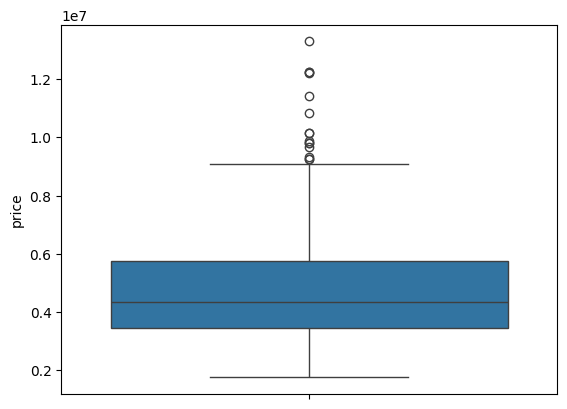

In [36]:
sns.boxplot(df.price)

In [52]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.count()

price               15
area                15
bedrooms            15
bathrooms           15
stories             15
mainroad            15
guestroom           15
basement            15
hotwaterheating     15
airconditioning     15
parking             15
prefarea            15
furnishingstatus    15
dtype: int64

In [53]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.300000e+02,530.000000,530.000000,530.000000,530.000000,530.000000
mean,4.600663e+06,5061.518868,2.943396,1.260377,1.788679,0.664151
std,1.596119e+06,2075.449479,0.730515,0.464359,0.861190,0.843320
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3547.500000,2.000000,1.000000,1.000000,0.000000
50%,4.270000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6315.750000,3.000000,1.000000,2.000000,1.000000
max,9.100000e+06,15600.000000,6.000000,3.000000,4.000000,3.000000


<Axes: ylabel='price'>

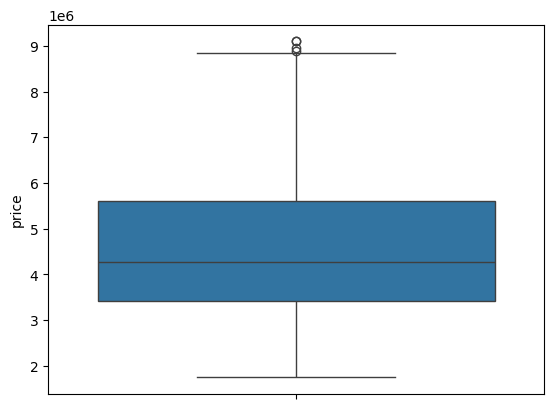

In [54]:
sns.boxplot(df['price'])

<Axes: >

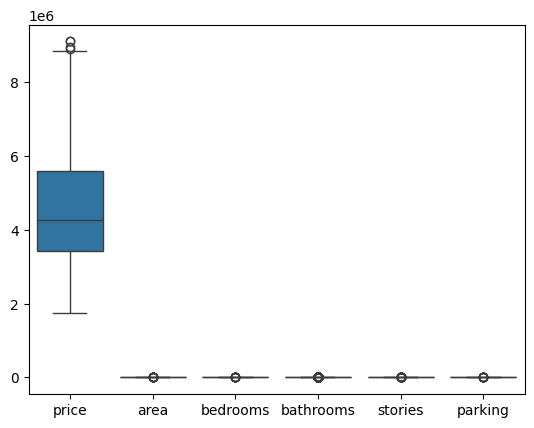

In [55]:
sns.boxplot(data = df)

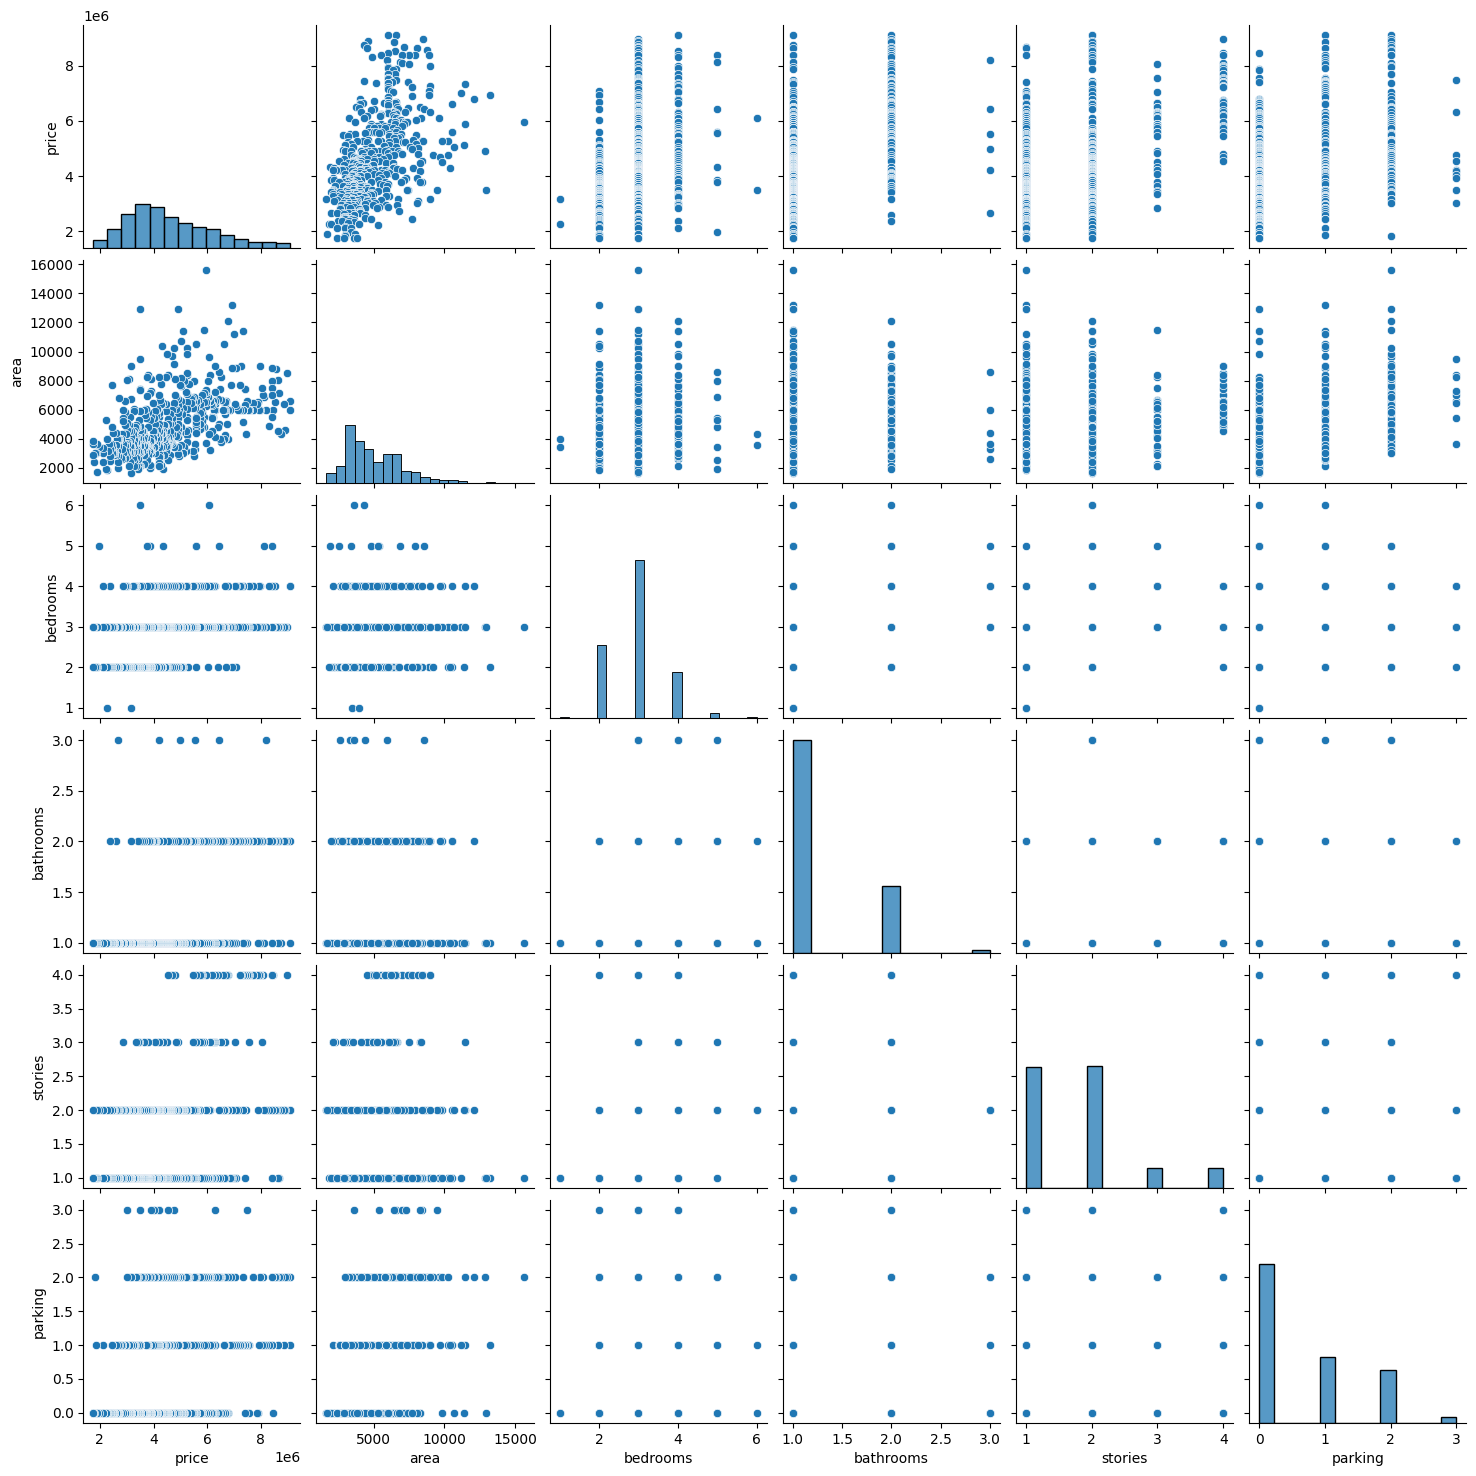

In [56]:
sns.pairplot(data = df)

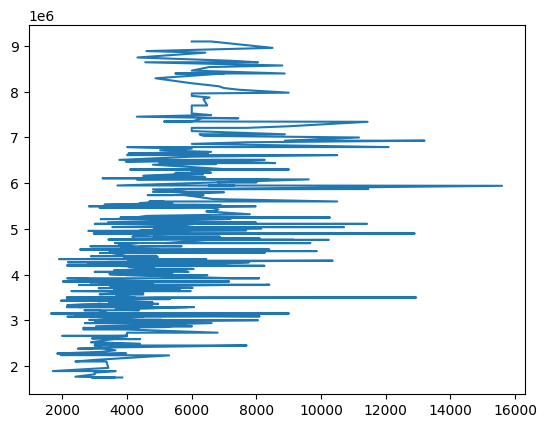

In [61]:
plt.plot(df['area'], df['price'])

<Axes: xlabel='area', ylabel='price'>

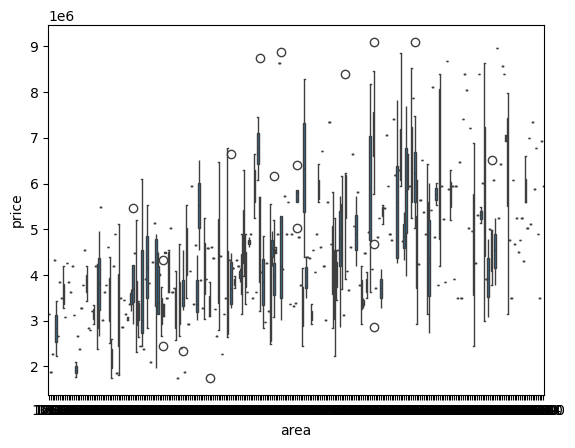

In [62]:
sns.boxplot(data = df, x = 'area', y = 'price')

C:\Users\Welcome\AppData\Local\Temp\ipykernel_9792\2157763299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_bin'] = pd.cut(df['area'], bins=10)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_9792\2157763299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_bin'] = pd.cut(df['price'], bins=10)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_9792\2157763299.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass o

<Axes: xlabel='price_bin', ylabel='area_bin'>

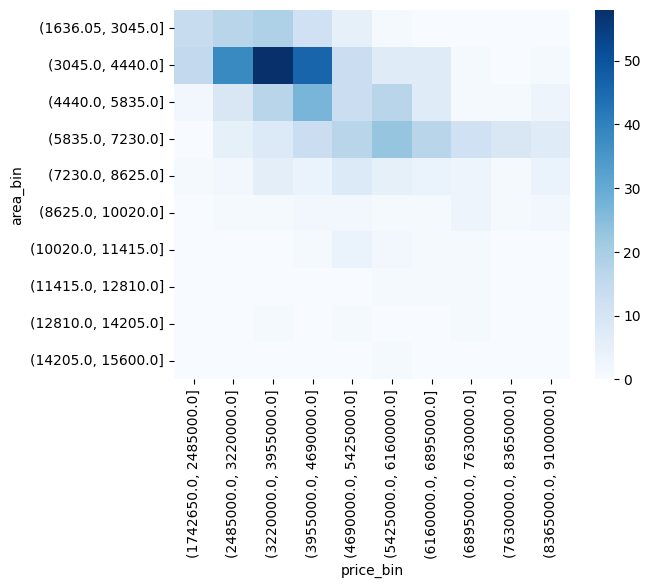

In [69]:
df['area_bin'] = pd.cut(df['area'], bins=10)
df['price_bin'] = pd.cut(df['price'], bins=10)
heatmap_data = df.groupby(['area_bin', 'price_bin']).size().unstack()
sns.heatmap(heatmap_data, cmap='Blues')

In [70]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_bin,price_bin
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,"(5835.0, 7230.0]","(8365000.0, 9100000.0]"
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,"(5835.0, 7230.0]","(8365000.0, 9100000.0]"
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished,"(7230.0, 8625.0]","(8365000.0, 9100000.0]"
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished,"(4440.0, 5835.0]","(8365000.0, 9100000.0]"
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished,"(5835.0, 7230.0]","(8365000.0, 9100000.0]"


In [71]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [72]:
df[varlist] = df[varlist].replace({'yes':1,'no':1})

C:\Users\Welcome\AppData\Local\Temp\ipykernel_9792\2879102138.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[varlist] = df[varlist].replace({'yes':1,'no':1})
C:\Users\Welcome\AppData\Local\Temp\ipykernel_9792\2879102138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[varlist] = df[varlist].replace({'yes':1,'no':1})


In [73]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_bin,price_bin
15,9100000,6000,4,1,2,1,1,1,1,1,2,1,semi-furnished,"(5835.0, 7230.0]","(8365000.0, 9100000.0]"
16,9100000,6600,4,2,2,1,1,1,1,1,1,1,unfurnished,"(5835.0, 7230.0]","(8365000.0, 9100000.0]"
17,8960000,8500,3,2,4,1,1,1,1,1,2,1,furnished,"(7230.0, 8625.0]","(8365000.0, 9100000.0]"
18,8890000,4600,3,2,2,1,1,1,1,1,2,1,furnished,"(4440.0, 5835.0]","(8365000.0, 9100000.0]"
19,8855000,6420,3,2,2,1,1,1,1,1,1,1,semi-furnished,"(5835.0, 7230.0]","(8365000.0, 9100000.0]"


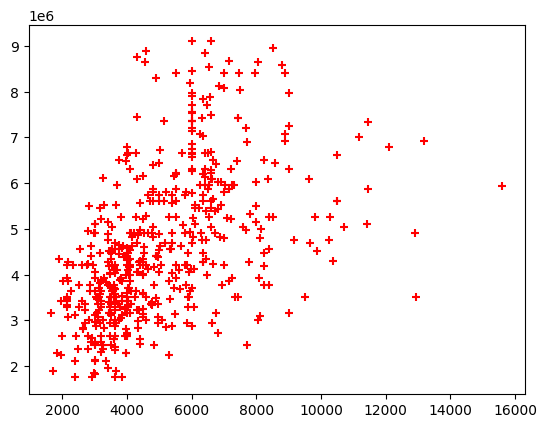

In [77]:
%matplotlib inline
plt.scatter(df.area,df.price,color = 'red',marker = '+')

In [109]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df['price'])
reg.predict([[3300]])

C:\Users\Welcome\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3909965.48373628])

In [110]:
reg.coef_

array([392.10344163])

In [111]:
reg.intercept_

2616024.126368602

In [114]:
df1 = pd.read_csv('D:\\data\\Prediction Model Data.csv')
df1

,area
0,3000
1,5000
2,3500
3,3367
4,3325
5,1152
6,2266
7,9988
8,4451
9,7845


In [115]:
p = reg.predict(df1)
p

array([3792334.45124831, 4576541.33450144, 3988386.17206159,
       3936236.41432526, 3919768.06977694, 3067727.29112241,
       3504530.52509441, 6532353.30133477, 4361276.54504846,
       5692075.62592903, 6480595.64704006, 3107721.84216832,
       3186926.73737689, 7460854.25110648, 3195945.1165343 ])